In [ ]:
##现在开始
from google.colab import drive

drive.mount('/content/gdrive/')


Mounted at /content/gdrive/


In [ ]:
!pip install kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"chrispaul2333","key":"d0d3880c28c2fbf0e8f8736cc9b8d601"}'}

In [ ]:
!mkdir -p ~/.kaggle

!cp kaggle.json ~/.kaggle/

!chmod 600 ~/.kaggle/kaggle.json

##现在在解压数据集

In [ ]:
!kaggle datasets download -d pkdarabi/diagnosis-of-diabetic-retinopathy -p '../content/gdrive/My Drive'

 74% 11.0M/14.9M [00:00<00:00, 19.1MB/s]
100% 14.9M/14.9M [00:00<00:00, 16.0MB/s]


In [ ]:
!unzip -n '../content/gdrive/My Drive/diagnosis-of-diabetic-retinopathy.zip' -d '../content/gdrive/My Drive'

Archive:  ../content/gdrive/My Drive/diagnosis-of-diabetic-retinopathy.zip
  inflating: ../content/gdrive/My Drive/test/DR/00cb6555d108_png.rf.29cca170969c6e9918ef9b9209abef8e.jpg  
  inflating: ../content/gdrive/My Drive/test/DR/0104b032c141_png.rf.2b861f09f8526f5316cd44d8522bf62e.jpg  
  inflating: ../content/gdrive/My Drive/test/DR/03747397839f_png.rf.b634cf9fb09372b2c9c6bc6616bd5d7c.jpg  
  inflating: ../content/gdrive/My Drive/test/DR/04d029cfb612_png.rf.d9cf2e2a4e995a99b83e2595d66db6d2.jpg  
  inflating: ../content/gdrive/My Drive/test/DR/0ada12c0e78f_png.rf.3e8e491a2cacb9af201e2f89f3afca61.jpg  
  inflating: ../content/gdrive/My Drive/test/DR/0bf37ca3156a_png.rf.5fd49da65121f9fd951a208b5f085744.jpg  
  inflating: ../content/gdrive/My Drive/test/DR/0f495d87656a_png.rf.707a2bb8a1223a714fcb88d67eb153c0.jpg  
  inflating: ../content/gdrive/My Drive/test/DR/1177d583c807_png.rf.ecb8848ab217877e4877c8034c59b198.jpg  
  inflating: ../content/gdrive/My Drive/test/DR/1411c8ab7161_png.rf.8

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:135: UserWarning: Using 'weights' as positional parameter(s) is deprecated since 0.13 and may be removed in the future. Please use keyword parameter(s) instead.
  warnings.warn(
Downloading: "https://download.pytorch.org/models/mobilenet_v2-7ebf99e0.pth" to /root/.cache/torch/hub/checkpoints/mobilenet_v2-7ebf99e0.pth
100%|██████████| 13.6M/13.6M [00:00<00:00, 132MB/s]
/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
/usr/local/lib/python3.10/dist-packages/torch/optim/lr_scheduler.py:28: UserWarning: 

Epoch [1/35] Iter [31/64] loss 0.6918
Epoch [1/35] Iter [61/64] loss 0.6736


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Epoch [1/35] Loss 0.70	Accuracy 46.14%
Epoch [2/35] Iter [31/64] loss 0.6857
Epoch [2/35] Iter [61/64] loss 0.7089
Epoch [2/35] Loss 0.69	Accuracy 54.61%
Epoch [3/35] Iter [31/64] loss 0.6561
Epoch [3/35] Iter [61/64] loss 0.6804
Epoch [3/35] Loss 0.69	Accuracy 61.02%
Epoch [4/35] Iter [31/64] loss 0.6884
Epoch [4/35] Iter [61/64] loss 0.7075
Epoch [4/35] Loss 0.69	Accuracy 61.02%
Epoch [5/35] Iter [31/64] loss 0.6620
Epoch [5/35] Iter [61/64] loss 0.6818
Epoch [5/35] Loss 0.68	Accuracy 64.03%
Epoch [6/35] Iter [31/64] loss 0.6806
Epoch [6/35] Iter [61/64] loss 0.6761
Epoch [6/35] Loss 0.68	Accuracy 63.47%
Epoch [7/35] Iter [31/64] loss 0.6807
Epoch [7/35] Iter [61/64] loss 0.6903
Epoch [7/35] Loss 0.68	Accuracy 66.48%
Epoch [8/35] Iter [31/64] loss 0.6939
Epoch [8/35] Iter [61/64] loss 0.6686
Epoch [8/35] Loss 0.68	Accuracy 68.36%
Epoch [9/35] Iter [31/64] loss 0.6862
Epoch [9/35] Iter [61/64] loss 0.6811
Epoch [9/35] Loss 0.68	Accuracy 66.67%
Epoch [10/35] Iter [31/64] loss 0.6807
Ep

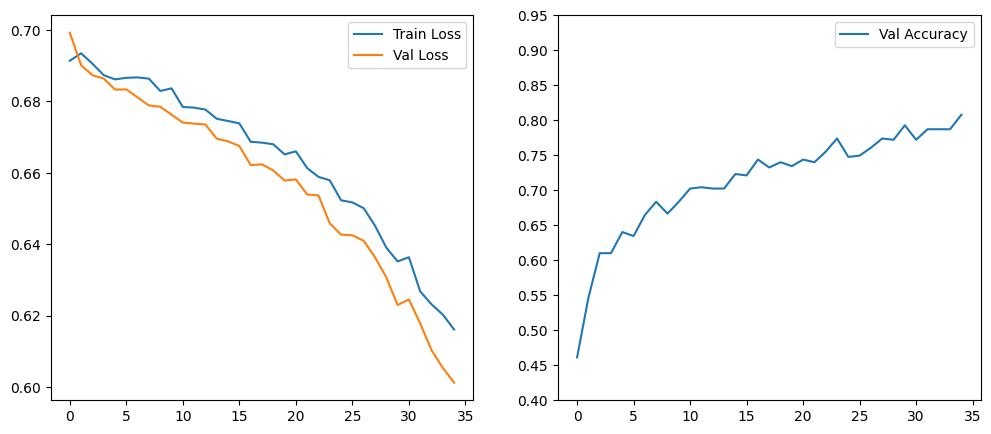

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision.datasets import ImageFolder
from torchvision.utils import make_grid
import matplotlib.pyplot as plt

import torch, random, json, os
import numpy as np

# Model-related task
from torchvision.models import mobilenet_v2, MobileNet_V2_Weights
from torch import nn

# Dataset
from torch.autograd import Variable
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from torchvision import transforms
import albumentations as A
from PIL import Image

# Plot
from matplotlib import pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
from pandas import DataFrame
import seaborn as sn

# 设置随机种子，以确保结果可重复
lr = 0.0001
batch_size = 32
num_epochs = 35
target_size = 224
gpu = 0
torch.manual_seed(42)
transform = transforms.Compose([
    transforms.Resize((target_size, target_size)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])
class DR_image(Dataset):
    def __init__(self, root_dir, mode = 'train', transform=None, albu_transformations = None):
        pos_path = os.path.join(root_dir, mode, 'DR')
        neg_path = os.path.join(root_dir, mode, 'No_DR')

        pos_list = [{"path": os.path.join('DR', x), "label": 1 } for x in os.listdir(pos_path)]
        neg_list = [{"path": os.path.join('No_DR', x), "label": 0 } for x in os.listdir(neg_path)]

        self.root_path = root_dir
        self.img_labels = [x for x in [*pos_list, *neg_list] if os.path.exists(os.path.join(root_dir, mode, x['path']))]
        self.transform = transform
        self.albu_transformations = albu_transformations
        self.mode = mode

    def __len__(self):
        return len(self.img_labels)

    def __getitem__(self, idx):
        data_each = self.img_labels[idx]
        img_path = os.path.join(self.root_path, self.mode, data_each['path'])

        img = Image.open(img_path)
        img = img.convert('RGB')

        if self.mode == 'train':
            label_arr = np.zeros(2)
            label_arr[data_each['label']] = 1
        else:
            label_arr = np.array([data_each['label']])

            one_hot_label_arr = np.zeros(2)
            one_hot_label_arr[data_each['label']] = 1
            one_hot_label_arr = torch.FloatTensor(one_hot_label_arr)

        label = torch.FloatTensor(label_arr)

        if self.albu_transformations is not None:
            img = self.albu_transformations(image = np.array(img))['image']
            img = Image.fromarray(img)

        if self.transform is not None:
            img = self.transform(img)

        if self.mode != 'valid':
            return img, label

        return img, label, one_hot_label_arr


class model(nn.Module):
    def __init__(self, pretrained = True):
        super().__init__()
        backbone = mobilenet_v2(MobileNet_V2_Weights.IMAGENET1K_V2, progress = True)
        self.backbone = backbone.features
        self.avgpool  = nn.AdaptiveAvgPool2d(1)
        self.dropout  = nn.Dropout(0.2)
        self.classifier = nn.Linear(backbone.last_channel, 2)

        # weight initialization
        for m in self.modules():
            if isinstance(m, nn.Conv2d):
                nn.init.kaiming_normal_(m.weight, mode="fan_out")
                if m.bias is not None:
                    nn.init.zeros_(m.bias)
            elif isinstance(m, (nn.BatchNorm2d, nn.GroupNorm)):
                nn.init.ones_(m.weight)
                nn.init.zeros_(m.bias)
            elif isinstance(m, nn.Linear):
                nn.init.normal_(m.weight, 0, 0.01)
                nn.init.zeros_(m.bias)

    def forward(self, x):
        x = self.backbone(x)
        x = self.avgpool(x)
        x = x.view(x.size(0), -1)
        x = self.dropout(x)
        return self.classifier(x)



data_dir = "/content/gdrive/MyDrive/"


output = "workdirs"



# Load Model
model = model(True)
model.cuda(gpu)

train_dataset = DR_image(data_dir, 'train', transform)
train_loader = torch.utils.data.DataLoader(train_dataset,
                                           batch_size = batch_size,
                                           shuffle = True, num_workers = 4)

# Validation Dataset
val_dataset = DR_image(data_dir, 'valid', transform, None)
val_loader  = torch.utils.data.DataLoader(val_dataset,
                                          batch_size = batch_size,
                                          shuffle = False, num_workers = 2)
criterion = nn.CrossEntropyLoss().cuda(gpu)
val_criterion = nn.CrossEntropyLoss(reduction = 'sum').cuda(gpu)
##optimizer = torch.optim.Adam(model.parameters(), lr = lr)
optimizer = torch.optim.SGD(model.parameters(), lr = lr)
lr_scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min',factor=0.5, patience=20,verbose=1)
start_epoch = 0


total_iter = len(train_dataset) // batch_size
epochs = list(range(start_epoch, num_epochs))
train_losses = []
val_losses = []
val_accuracy = []
val_best_accuracy=0
f = open(os.path.join("training.log"), "a")
for epoch in range(start_epoch, num_epochs):
    model.train()
    train_loss_temp = []
    for i, (images, labels) in enumerate(train_loader):
        images = Variable(images).cuda(gpu)
        labels = Variable(labels).cuda(gpu)

        # Run through network
        result = model(images)

        # Loss Function
        loss = criterion(result, labels)

        # Back propagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # For Display
        loss_value = loss.item()
        if i > 0 and i % 30 == 0:
            print(f"Epoch [{epoch+1}/{num_epochs}] Iter [{ i+1 }/{ total_iter }] loss {loss_value:.4f}")

        f.write(json.dumps({
            "mode": "train",
            "epoch": epoch+1,
            "num_epochs": num_epochs,
            "iter": i,
            "total_iter": total_iter,
            "loss": loss_value,
        }))
        f.write("\n")

        train_loss_temp.append(loss_value)

    train_losses.append(np.mean(np.array(train_loss_temp)))

    state_dict = {
        "model": model.state_dict(),
        "optim": optimizer.state_dict(),
        "scheduler": lr_scheduler.state_dict(),
        "epoch": epoch + 1
    }

    torch.save(state_dict, os.path.join(f"{ epoch + 1 }.pth"))

    model.eval()
    with torch.no_grad():
        accuracy = 0.0
        total = 0
        val_loss = torch.scalar_tensor(0.0).cuda(gpu)
        for i, (images, labels, one_hot_label_arr) in enumerate(val_loader):
            images = Variable(images).cuda(gpu)
            labels = Variable(labels).reshape(labels.size(0)) #.cuda(gpu)
            one_hot_label_arr = Variable(one_hot_label_arr).cuda(gpu)

            # Prediction
            result = model(images)
            _, predicted = torch.max(result, dim = 1)

            val_loss += val_criterion(result, one_hot_label_arr)
            accuracy += (predicted.cpu() == labels).sum().item()
            total += labels.size(0)

        val_loss = val_loss / total
        accuracy = accuracy / total

        val_losses.append(val_loss.cpu())
        val_accuracy.append(accuracy)

        precent_accuracy = accuracy * 100
        print(f"Epoch [{ epoch + 1 }/{ num_epochs }] Loss {val_loss:.2f}\tAccuracy {precent_accuracy:.2f}%")
        if val_best_accuracy<precent_accuracy:
          val_best_accuracy=precent_accuracy
          torch.save(model.state_dict(), os.path.join("best_model.pth"))


        lr_scheduler.step(val_loss)

        f.write(json.dumps({
            "mode": "val",
            "epoch": epoch+1,
            "num_epochs": num_epochs,
            "loss": float(val_loss.cpu()),
            "accuracy": accuracy
        }))
        f.write("\n")

f.close()

losses_train = [x for x in train_losses]
losses_valid = [x for x in val_losses]
plt.figure(figsize = (12, 5))
plt.subplot(1,2,1)
plt.plot(epochs, np.array(losses_train), label = 'Train Loss')
plt.plot(epochs, np.array(losses_valid), label = 'Val Loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(epochs, np.array(val_accuracy), label = 'Val Accuracy')
plt.yticks(np.arange(0.4, 1.0, 0.05))
plt.legend()
plt.show()

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision.datasets import ImageFolder
from torchvision.utils import make_grid
import matplotlib.pyplot as plt

import torch, random, json, os
import numpy as np

# Model-related task
from torchvision.models import mobilenet_v2, MobileNet_V2_Weights
from torch import nn

# Dataset
from torch.autograd import Variable
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from torchvision import transforms
import albumentations as A
from PIL import Image

# Plot
from matplotlib import pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
from pandas import DataFrame
import seaborn as sn

# 设置随机种子，以确保结果可重复
lr = 0.0001
batch_size = 32
num_epochs = 35
target_size = 224
gpu = 0
torch.manual_seed(42)
transform = transforms.Compose([
    transforms.Resize((target_size, target_size)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])
class DR_image(Dataset):
    def __init__(self, root_dir, mode = 'train', transform=None, albu_transformations = None):
        pos_path = os.path.join(root_dir, mode, 'DR')
        neg_path = os.path.join(root_dir, mode, 'No_DR')

        pos_list = [{"path": os.path.join('DR', x), "label": 1 } for x in os.listdir(pos_path)]
        neg_list = [{"path": os.path.join('No_DR', x), "label": 0 } for x in os.listdir(neg_path)]

        self.root_path = root_dir
        self.img_labels = [x for x in [*pos_list, *neg_list] if os.path.exists(os.path.join(root_dir, mode, x['path']))]
        self.transform = transform
        self.albu_transformations = albu_transformations
        self.mode = mode

    def __len__(self):
        return len(self.img_labels)

    def __getitem__(self, idx):
        data_each = self.img_labels[idx]
        img_path = os.path.join(self.root_path, self.mode, data_each['path'])

        img = Image.open(img_path)
        img = img.convert('RGB')

        if self.mode == 'train':
            label_arr = np.zeros(2)
            label_arr[data_each['label']] = 1
        else:
            label_arr = np.array([data_each['label']])

            one_hot_label_arr = np.zeros(2)
            one_hot_label_arr[data_each['label']] = 1
            one_hot_label_arr = torch.FloatTensor(one_hot_label_arr)

        label = torch.FloatTensor(label_arr)

        if self.albu_transformations is not None:
            img = self.albu_transformations(image = np.array(img))['image']
            img = Image.fromarray(img)

        if self.transform is not None:
            img = self.transform(img)

        if self.mode != 'valid':
            return img, label

        return img, label, one_hot_label_arr


class model(nn.Module):
    def __init__(self, pretrained = True):
        super().__init__()
        backbone = mobilenet_v2(MobileNet_V2_Weights.IMAGENET1K_V2, progress = True)
        self.backbone = backbone.features
        self.avgpool  = nn.AdaptiveAvgPool2d(1)
        self.dropout  = nn.Dropout(0.2)
        self.classifier = nn.Linear(backbone.last_channel, 2)

        # weight initialization
        for m in self.modules():
            if isinstance(m, nn.Conv2d):
                nn.init.kaiming_normal_(m.weight, mode="fan_out")
                if m.bias is not None:
                    nn.init.zeros_(m.bias)
            elif isinstance(m, (nn.BatchNorm2d, nn.GroupNorm)):
                nn.init.ones_(m.weight)
                nn.init.zeros_(m.bias)
            elif isinstance(m, nn.Linear):
                nn.init.normal_(m.weight, 0, 0.01)
                nn.init.zeros_(m.bias)

    def forward(self, x):
        x = self.backbone(x)
        x = self.avgpool(x)
        x = x.view(x.size(0), -1)
        x = self.dropout(x)
        return self.classifier(x)



data_dir = "/content/gdrive/MyDrive/"


output = "workdirs"



# Load Model
model = model(True)
model.cuda(gpu)

train_dataset = DR_image(data_dir, 'train', transform)
train_loader = torch.utils.data.DataLoader(train_dataset,
                                           batch_size = batch_size,
                                           shuffle = True, num_workers = 4)

# Validation Dataset
val_dataset = DR_image(data_dir, 'valid', transform, None)
val_loader  = torch.utils.data.DataLoader(val_dataset,
                                          batch_size = batch_size,
                                          shuffle = False, num_workers = 2)
criterion = nn.CrossEntropyLoss().cuda(gpu)
val_criterion = nn.CrossEntropyLoss(reduction = 'sum').cuda(gpu)
optimizer = torch.optim.Adam(model.parameters(), lr = lr)
##optimizer = torch.optim.SGD(model.parameters(), lr = lr)
lr_scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min',factor=0.5, patience=20,verbose=1)
start_epoch = 0


total_iter = len(train_dataset) // batch_size
epochs = list(range(start_epoch, num_epochs))
train_losses = []
val_losses = []
val_accuracy = []
val_best_accuracy=0
f = open(os.path.join("training.log"), "a")
for epoch in range(start_epoch, num_epochs):
    model.train()
    train_loss_temp = []
    for i, (images, labels) in enumerate(train_loader):
        images = Variable(images).cuda(gpu)
        labels = Variable(labels).cuda(gpu)

        # Run through network
        result = model(images)
        print(labels,result)
        # Loss Function
        loss = criterion(result, labels)

        # Back propagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # For Display
        loss_value = loss.item()
        if i > 0 and i % 30 == 0:
            print(f"Epoch [{epoch+1}/{num_epochs}] Iter [{ i+1 }/{ total_iter }] loss {loss_value:.4f}")

        f.write(json.dumps({
            "mode": "train",
            "epoch": epoch+1,
            "num_epochs": num_epochs,
            "iter": i,
            "total_iter": total_iter,
            "loss": loss_value,
        }))
        f.write("\n")

        train_loss_temp.append(loss_value)

    train_losses.append(np.mean(np.array(train_loss_temp)))

    state_dict = {
        "model": model.state_dict(),
        "optim": optimizer.state_dict(),
        "scheduler": lr_scheduler.state_dict(),
        "epoch": epoch + 1
    }

    torch.save(state_dict, os.path.join(f"{ epoch + 1 }.pth"))

    model.eval()
    with torch.no_grad():
        accuracy = 0.0
        total = 0
        val_loss = torch.scalar_tensor(0.0).cuda(gpu)
        for i, (images, labels, one_hot_label_arr) in enumerate(val_loader):
            images = Variable(images).cuda(gpu)
            labels = Variable(labels).reshape(labels.size(0)) #.cuda(gpu)
            one_hot_label_arr = Variable(one_hot_label_arr).cuda(gpu)

            # Prediction
            result = model(images)
            _, predicted = torch.max(result, dim = 1)

            val_loss += val_criterion(result, one_hot_label_arr)
            accuracy += (predicted.cpu() == labels).sum().item()
            total += labels.size(0)

        val_loss = val_loss / total
        accuracy = accuracy / total

        val_losses.append(val_loss.cpu())
        val_accuracy.append(accuracy)

        precent_accuracy = accuracy * 100
        print(f"Epoch [{ epoch + 1 }/{ num_epochs }] Loss {val_loss:.2f}\tAccuracy {precent_accuracy:.2f}%")
        if val_best_accuracy<precent_accuracy:
          val_best_accuracy=precent_accuracy
          torch.save(model.state_dict(), os.path.join("best_model.pth"))


        lr_scheduler.step(val_loss)

        f.write(json.dumps({
            "mode": "val",
            "epoch": epoch+1,
            "num_epochs": num_epochs,
            "loss": float(val_loss.cpu()),
            "accuracy": accuracy
        }))
        f.write("\n")

f.close()

losses_train = [x for x in train_losses]
losses_valid = [x for x in val_losses]
plt.figure(figsize = (12, 5))
plt.subplot(1,2,1)
plt.plot(epochs, np.array(losses_train), label = 'Train Loss')
plt.plot(epochs, np.array(losses_valid), label = 'Val Loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(epochs, np.array(val_accuracy), label = 'Val Accuracy')
plt.yticks(np.arange(0.4, 1.0, 0.05))
plt.legend()
plt.show()

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:135: UserWarning: Using 'weights' as positional parameter(s) is deprecated since 0.13 and may be removed in the future. Please use keyword parameter(s) instead.
  warnings.warn(


tensor([[0., 1.],
        [1., 0.],
        [0., 1.],
        [0., 1.],
        [1., 0.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [0., 1.],
        [0., 1.],
        [1., 0.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [1., 0.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [0., 1.],
        [1., 0.],
        [1., 0.]], device='cuda:0') tensor([[-2.0582e-01,  6.4030e-02],
        [-6.3122e-02,  1.2986e-01],
        [ 4.9139e-02, -1.0221e-01],
        [ 1.8107e-04,  7.1584e-02],
        [ 2.6211e-02,  1.0562e-01],
        [-6.9001e-02,  1.7539e-01],
        [-1.0143e-02,  8.8449e-02],
        [ 1.0824e-02,  8.6846e-02],
        [-2.2026e-02,  2.7094e-01],
        [ 6.2704e-02,  3.6864e-02],
        [-7.9680e-02,  7.7748e-02],
        [-

KeyboardInterrupt: 

In [ ]:
import torch
import torchvision.transforms as transforms
from PIL import Image
import numpy as np

# 定义图像转换
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # 调整图像大小
    transforms.ToTensor(),  # 转换为张量
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # 归一化
])
class model(nn.Module):
    def __init__(self, pretrained = True):
        super().__init__()
        backbone = mobilenet_v2(MobileNet_V2_Weights.IMAGENET1K_V2, progress = True)
        self.backbone = backbone.features
        self.avgpool  = nn.AdaptiveAvgPool2d(1)
        self.dropout  = nn.Dropout(0.2)
        self.classifier = nn.Linear(backbone.last_channel, 2)

        # weight initialization
        for m in self.modules():
            if isinstance(m, nn.Conv2d):
                nn.init.kaiming_normal_(m.weight, mode="fan_out")
                if m.bias is not None:
                    nn.init.zeros_(m.bias)
            elif isinstance(m, (nn.BatchNorm2d, nn.GroupNorm)):
                nn.init.ones_(m.weight)
                nn.init.zeros_(m.bias)
            elif isinstance(m, nn.Linear):
                nn.init.normal_(m.weight, 0, 0.01)
                nn.init.zeros_(m.bias)

    def forward(self, x):
        x = self.backbone(x)
        x = self.avgpool(x)
        x = x.view(x.size(0), -1)
        x = self.dropout(x)
        return self.classifier(x)
# 加载模型
model = model(False)  # 根据您的模型类名进行实例化
model.load_state_dict(torch.load('/content/best_model.pth'))  # 加载保存的最佳模型参数
model.eval()  # 设置为推断模式

# 读取待推断的图像并进行预处理
img_path = '/content/gdrive/MyDrive/valid/No_DR/04aef84a2cc1_png.rf.8277e09e3432478ed982f918812b8468.jpg'
img = Image.open(img_path)
img = img.convert('RGB')
img = transform(img).unsqueeze(0)  # 在第0维度上增加一个维度，成为一个batch

# 使用GPU进行推断（如果有GPU的话）
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
img = img.to(device)
model = model.to(device)

# 进行推断
with torch.no_grad():
    output = model(img)

# 获取预测结果
_, predicted = torch.max(output, 1)
predicted_label = predicted.item()

# 打印预测结果
if predicted_label == 1:
    print('预测结果：DR')
else:
    print('预测结果：No_DR')

预测结果：No_DR


In [ ]:
from torch import nn
import torch
class ConvBNReLU(nn.Sequential):#depthwise conv+BN+relu6，用于构建InvertedResidual。
    def __init__(self, in_channel, out_channel, kernel_size=3, stride=1, groups=1):
        #参数：输入的tensor的通道数，输出通道数，卷积核大小，卷积步距，输入与输出对应的块数（改为输入的层数就是depth wise conv了，详见https://blog.csdn.net/weixin_43572595/article/details/110563397）
        padding = (kernel_size - 1) // 2#根据卷积核大小获取padding大小
        super(ConvBNReLU, self).__init__(
            nn.Conv2d(in_channel, out_channel, kernel_size, stride, padding, groups=groups, bias=False),
            #构建depthwise conv卷积，不使用偏置，因为后面有BN
            nn.BatchNorm2d(out_channel),#BN层，输入参数为输入的tensor的层数
            nn.ReLU6(inplace=True)#relu6激活函数，inplace原地操作tensor减少内存占用
        )
class InvertedResidual(nn.Module):#逆向残差结构
    def __init__(self, in_channel, out_channel, stride, expand_ratio):
        #参数：输入的tensor的通道数，输出的通道数，中间depthwise conv的步距，第一个1x1普通卷积的channel放大倍数
        super(InvertedResidual, self).__init__()
        hidden_channel = in_channel * expand_ratio#隐层的输入通道数，对应中间depthwise conv的输入通道数
        self.use_shortcut = stride == 1 and in_channel == out_channel
        #使用shortcut的条件：输入与输出shape一样，即没有缩放（stride=1）,维度一样（in_channel = out_channel）

        layers = []#搜集各个层
        if expand_ratio != 1:#这个是由于第一个卷积没有维度放大，因而不需要第一个1x1普通卷积
            # 1x1 pointwise conv，第一个普通1x1卷积，升维
            layers.append(ConvBNReLU(in_channel, hidden_channel, kernel_size=1))
        layers.extend([
            # 3x3 depthwise conv
            ConvBNReLU(hidden_channel, hidden_channel, stride=stride, groups=hidden_channel),
            # 1x1 pointwise conv(linear)第二个普通1x1卷积，降维
            nn.Conv2d(hidden_channel, out_channel, kernel_size=1, bias=False),
            nn.BatchNorm2d(out_channel),#BN
        ])

        self.conv = nn.Sequential(*layers)#将上面的集成到一起

    def forward(self, x):#前向传播过程，直接用上面弄好的conv层
        if self.use_shortcut:
            return x + self.conv(x)
        else:
            return self.conv(x)
def _make_divisible(ch, divisor=8, min_ch=None):#用于获取channel离divisor倍数最近的数，这个大概是为了方便底层调用的，具体原理我不懂
    #参数：原来的通道数，谁的倍数，最小不能小于这个
    """
    This function is taken from the original tf repo.
    It ensures that all layers have a channel number that is divisible by 8
    It can be seen here:
    https://github.com/tensorflow/models/blob/master/research/slim/nets/mobilenet/mobilenet.py
    """
    if min_ch is None:#没输min_ch就默认为divisor
        min_ch = divisor
    new_ch = max(min_ch, int(ch + divisor / 2) // divisor * divisor)#获取通道数离divisor最近的倍数
    # Make sure that round down does not go down by more than 10%.
    if new_ch < 0.9 * ch:
        new_ch += divisor
    return new_ch
class MobileNetV2(nn.Module):#整体的网络
    def __init__(self, num_classes=2, alpha=1.0, round_nearest=8):
      ##classes 分类的个数
        #参数：类的个数，各个层的深度缩放系数（width multiplier），深度数需要改成离其最近的倍数
        super(MobileNetV2, self).__init__()
        block = InvertedResidual#将逆向卷积赋给block，改个名
        input_channel = _make_divisible(32 * alpha, round_nearest)
        #获取原始图片进来后的卷积的输出通道数离round_nearest最近的倍数
        last_channel = _make_divisible(1280 * alpha, round_nearest)
        #获取特征提取部分最后的输出通道数离round_nearest最近的倍数
        inverted_residual_setting = [
            #配置表，这些都是逆向残差层   t：维度放大倍数，c：该层的输出通道数，n：该层的重复次数，s：该层的中间的depthwise conv的步距（仅限第一个inverted_residual）。
            # t, c, n, s
            [1, 16, 1, 1],
            [6, 24, 2, 2],
            [6, 32, 3, 2],
            [6, 64, 4, 2],
            [6, 96, 3, 1],
            [6, 160, 3, 2],
            [6, 320, 1, 1],
        ]

        features = []#收集特征提取部分网络层
        # conv1 layer，第一层，一个3x3普通卷积，步距为2
        features.append(ConvBNReLU(3, input_channel, stride=2))
        # building inverted residual residual blockes，遍历上面的配置，构建中间的逆向残差层
        for t, c, n, s in inverted_residual_setting:
            output_channel = _make_divisible(c * alpha, round_nearest)
            #获取缩放后的通道数离round_nearest最近的倍数
            for i in range(n):#构建n层逆向残差
                stride = s if i == 0 else 1#只有第一层逆向残差层的depthwise conv才有步距不为1
                features.append(block(input_channel, output_channel, stride, expand_ratio=t))
                input_channel = output_channel
        # building last several layers，构建逆向残差后面的1x1普通卷积
        features.append(ConvBNReLU(input_channel, last_channel, 1))
        # combine feature layers，整合特征提取部分的网络
        self.features = nn.Sequential(*features)

        # building classifier，自适应池化层，参数是输出的tensor的大小
        self.avgpool = nn.AdaptiveAvgPool2d((1, 1))
        self.classifier = nn.Sequential(#分类层，drop+全连接层
            nn.Dropout(0.2),
            nn.Linear(last_channel, num_classes)
        )

        # weight initialization，初始化各层
        for m in self.modules():
            if isinstance(m, nn.Conv2d):#卷积层
                nn.init.kaiming_normal_(m.weight, mode='fan_out')#权重用何凯明初始化
                if m.bias is not None:
                    nn.init.zeros_(m.bias)#偏置初始化为0
            elif isinstance(m, nn.BatchNorm2d):#BN，（x-bias）/weight
                nn.init.ones_(m.weight)#初始化为1
                nn.init.zeros_(m.bias)#初始化为0
            elif isinstance(m, nn.Linear):#全连接层
                nn.init.normal_(m.weight, 0, 0.01)#权重初始化为均值为0.方差为0.01的正态分布
                nn.init.zeros_(m.bias)#偏置初始化为0

    def forward(self, x):#前向传播过程
        x = self.features(x)#获得特征图
        x = self.avgpool(x)#自适应池化，把每层大小从7x7变成了1x1
        #x = torch.flatten(x, 1)#展平操作，从dim=1开始
        x = x.view(x.size(0), -1)
        x = self.classifier(x)#通过分类层获取每个类的概率
        return x

Epoch [1/35] Iter [31/64] loss 0.3431
Epoch [1/35] Iter [61/64] loss 0.2632
Epoch [1/35] Loss 1.50	Accuracy 46.14%
Epoch [2/35] Iter [31/64] loss 0.1777
Epoch [2/35] Iter [61/64] loss 0.0945
Epoch [2/35] Loss 0.25	Accuracy 90.96%
Epoch [3/35] Iter [31/64] loss 0.2944
Epoch [3/35] Iter [61/64] loss 0.1877
Epoch [3/35] Loss 0.22	Accuracy 91.53%
Epoch [4/35] Iter [31/64] loss 0.1308
Epoch [4/35] Iter [61/64] loss 0.1493
Epoch [4/35] Loss 0.26	Accuracy 93.41%
Epoch [5/35] Iter [31/64] loss 0.0934
Epoch [5/35] Iter [61/64] loss 0.0834
Epoch [5/35] Loss 0.35	Accuracy 92.09%
Epoch [6/35] Iter [31/64] loss 0.0666
Epoch [6/35] Iter [61/64] loss 0.3419
Epoch [6/35] Loss 0.40	Accuracy 86.06%
Epoch [7/35] Iter [31/64] loss 0.0325
Epoch [7/35] Iter [61/64] loss 0.3688
Epoch [7/35] Loss 0.29	Accuracy 91.53%
Epoch [8/35] Iter [31/64] loss 0.2250
Epoch [8/35] Iter [61/64] loss 0.2277
Epoch [8/35] Loss 0.22	Accuracy 93.03%
Epoch [9/35] Iter [31/64] loss 0.1368
Epoch [9/35] Iter [61/64] loss 0.0670
Epoc

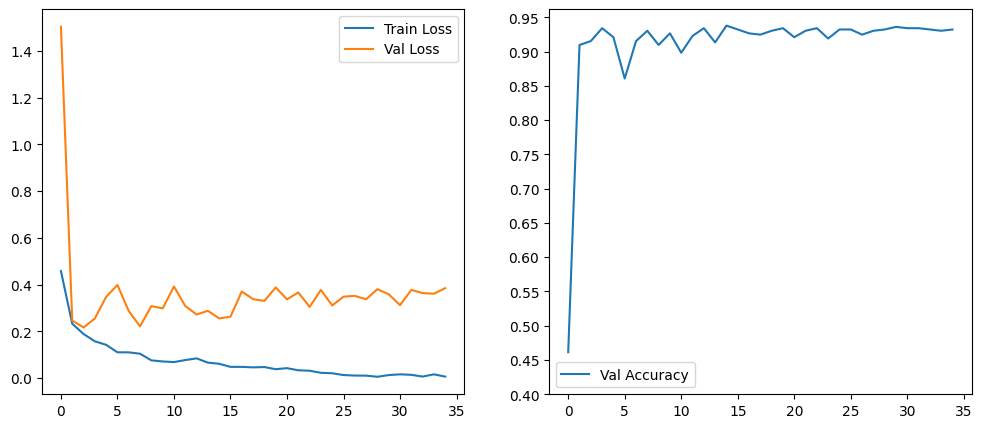

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision.datasets import ImageFolder
from torchvision.utils import make_grid
import matplotlib.pyplot as plt

import torch, random, json, os
import numpy as np

# Model-related task
from torchvision.models import mobilenet_v2, MobileNet_V2_Weights
from torch import nn

# Dataset
from torch.autograd import Variable
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from torchvision import transforms
import albumentations as A
from PIL import Image

# Plot
from matplotlib import pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
from pandas import DataFrame
import seaborn as sn

# 设置随机种子，以确保结果可重复
lr = 0.0001
batch_size = 32
num_epochs = 35
target_size = 224
gpu = 0
torch.manual_seed(42)
transform = transforms.Compose([
    transforms.Resize((target_size, target_size)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])
class DR_image(Dataset):
    def __init__(self, root_dir, mode = 'train', transform=None, albu_transformations = None):
        pos_path = os.path.join(root_dir, mode, 'DR')
        neg_path = os.path.join(root_dir, mode, 'No_DR')

        pos_list = [{"path": os.path.join('DR', x), "label": 1 } for x in os.listdir(pos_path)]
        neg_list = [{"path": os.path.join('No_DR', x), "label": 0 } for x in os.listdir(neg_path)]

        self.root_path = root_dir
        self.img_labels = [x for x in [*pos_list, *neg_list] if os.path.exists(os.path.join(root_dir, mode, x['path']))]
        self.transform = transform
        self.albu_transformations = albu_transformations
        self.mode = mode

    def __len__(self):
        return len(self.img_labels)

    def __getitem__(self, idx):
        data_each = self.img_labels[idx]
        img_path = os.path.join(self.root_path, self.mode, data_each['path'])

        img = Image.open(img_path)
        img = img.convert('RGB')

        if self.mode == 'train':
            label_arr = np.zeros(2)
            label_arr[data_each['label']] = 1
        else:
            label_arr = np.array([data_each['label']])

            one_hot_label_arr = np.zeros(2)
            one_hot_label_arr[data_each['label']] = 1
            one_hot_label_arr = torch.FloatTensor(one_hot_label_arr)

        label = torch.FloatTensor(label_arr)

        if self.albu_transformations is not None:
            img = self.albu_transformations(image = np.array(img))['image']
            img = Image.fromarray(img)

        if self.transform is not None:
            img = self.transform(img)

        if self.mode != 'valid':
            return img, label

        return img, label, one_hot_label_arr


class model(nn.Module):
    def __init__(self, pretrained = True):
        super().__init__()
        backbone = mobilenet_v2(MobileNet_V2_Weights.IMAGENET1K_V2, progress = True)
        self.backbone = backbone.features
        self.avgpool  = nn.AdaptiveAvgPool2d(1)
        self.dropout  = nn.Dropout(0.2)
        self.classifier = nn.Linear(backbone.last_channel, 2)

        # weight initialization
        for m in self.modules():
            if isinstance(m, nn.Conv2d):
                nn.init.kaiming_normal_(m.weight, mode="fan_out")
                if m.bias is not None:
                    nn.init.zeros_(m.bias)
            elif isinstance(m, (nn.BatchNorm2d, nn.GroupNorm)):
                nn.init.ones_(m.weight)
                nn.init.zeros_(m.bias)
            elif isinstance(m, nn.Linear):
                nn.init.normal_(m.weight, 0, 0.01)
                nn.init.zeros_(m.bias)

    def forward(self, x):
        x = self.backbone(x)
        x = self.avgpool(x)
        x = x.view(x.size(0), -1)
        x = self.dropout(x)
        return self.classifier(x)



data_dir = "/content/gdrive/MyDrive/"


output = "workdirs"



# Load Model
model = MobileNetV2()
model.cuda(gpu)

train_dataset = DR_image(data_dir, 'train', transform)
train_loader = torch.utils.data.DataLoader(train_dataset,
                                           batch_size = batch_size,
                                           shuffle = True, num_workers = 4)

# Validation Dataset
val_dataset = DR_image(data_dir, 'valid', transform, None)
val_loader  = torch.utils.data.DataLoader(val_dataset,
                                          batch_size = batch_size,
                                          shuffle = False, num_workers = 2)
criterion = nn.CrossEntropyLoss().cuda(gpu)
val_criterion = nn.CrossEntropyLoss(reduction = 'sum').cuda(gpu)
optimizer = torch.optim.Adam(model.parameters(), lr = lr)
##optimizer = torch.optim.SGD(model.parameters(), lr = lr)
lr_scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min',factor=0.5, patience=20,verbose=1)
start_epoch = 0


total_iter = len(train_dataset) // batch_size
epochs = list(range(start_epoch, num_epochs))
train_losses = []
val_losses = []
val_accuracy = []
val_best_accuracy=0
f = open(os.path.join("training.log"), "a")
for epoch in range(start_epoch, num_epochs):
    model.train()
    train_loss_temp = []
    for i, (images, labels) in enumerate(train_loader):
        images = Variable(images).cuda(gpu)
        labels = Variable(labels).cuda(gpu)

        # Run through network
        result = model(images)
        ##print(labels,result)
        # Loss Function
        loss = criterion(result, labels)

        # Back propagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # For Display
        loss_value = loss.item()
        if i > 0 and i % 30 == 0:
            print(f"Epoch [{epoch+1}/{num_epochs}] Iter [{ i+1 }/{ total_iter }] loss {loss_value:.4f}")

        f.write(json.dumps({
            "mode": "train",
            "epoch": epoch+1,
            "num_epochs": num_epochs,
            "iter": i,
            "total_iter": total_iter,
            "loss": loss_value,
        }))
        f.write("\n")

        train_loss_temp.append(loss_value)

    train_losses.append(np.mean(np.array(train_loss_temp)))

    state_dict = {
        "model": model.state_dict(),
        "optim": optimizer.state_dict(),
        "scheduler": lr_scheduler.state_dict(),
        "epoch": epoch + 1
    }

    torch.save(state_dict, os.path.join(f"{ epoch + 1 }.pth"))

    model.eval()
    with torch.no_grad():
        accuracy = 0.0
        total = 0
        val_loss = torch.scalar_tensor(0.0).cuda(gpu)
        for i, (images, labels, one_hot_label_arr) in enumerate(val_loader):
            images = Variable(images).cuda(gpu)
            labels = Variable(labels).reshape(labels.size(0)) #.cuda(gpu)
            one_hot_label_arr = Variable(one_hot_label_arr).cuda(gpu)

            # Prediction
            result = model(images)
            _, predicted = torch.max(result, dim = 1)

            val_loss += val_criterion(result, one_hot_label_arr)
            accuracy += (predicted.cpu() == labels).sum().item()
            total += labels.size(0)

        val_loss = val_loss / total
        accuracy = accuracy / total

        val_losses.append(val_loss.cpu())
        val_accuracy.append(accuracy)

        precent_accuracy = accuracy * 100
        print(f"Epoch [{ epoch + 1 }/{ num_epochs }] Loss {val_loss:.2f}\tAccuracy {precent_accuracy:.2f}%")
        if val_best_accuracy<precent_accuracy:
          val_best_accuracy=precent_accuracy
          torch.save(model.state_dict(), os.path.join("best_model.pth"))


        lr_scheduler.step(val_loss)

        f.write(json.dumps({
            "mode": "val",
            "epoch": epoch+1,
            "num_epochs": num_epochs,
            "loss": float(val_loss.cpu()),
            "accuracy": accuracy
        }))
        f.write("\n")

f.close()

losses_train = [x for x in train_losses]
losses_valid = [x for x in val_losses]
plt.figure(figsize = (12, 5))
plt.subplot(1,2,1)
plt.plot(epochs, np.array(losses_train), label = 'Train Loss')
plt.plot(epochs, np.array(losses_valid), label = 'Val Loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(epochs, np.array(val_accuracy), label = 'Val Accuracy')
plt.yticks(np.arange(0.4, 1.0, 0.05))
plt.legend()
plt.show()